In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Loading and Profiling ---
# Load Sierra Leone raw data
df_sl = pd.read_csv('../data/sierra_leone-bumbuna.csv')

# Basic profiling
print("Initial info:")
print(df_sl.info())
print("\nFirst rows:")
print(df_sl.head())
print("\nMissing values per column:")
print(df_sl.isna().sum())
print("\nStatistical summary:")
print(df_sl.describe())

# --- Data Cleaning ---
# Convert 'Timestamp' to datetime and set as index if present
if 'Timestamp' in df_sl.columns:
    df_sl['Timestamp'] = pd.to_datetime(df_sl['Timestamp'], errors='coerce')
    df_sl.set_index('Timestamp', inplace=True)

# Drop columns that are empty or not useful (e.g., 'Comments')
cols_to_drop = [col for col in ['Comments'] if col in df_sl.columns]
df_sl_clean = df_sl.drop(columns=cols_to_drop)

# Remove outliers using Z-score for key columns (if present)
columns_to_check = [col for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'] if col in df_sl_clean.columns]
if columns_to_check:
    from scipy.stats import zscore
    z_scores = np.abs(df_sl_clean[columns_to_check].apply(zscore))
    outliers = (z_scores > 3).any(axis=1)
    print(f"Number of outlier rows: {outliers.sum()}")
    df_sl_clean = df_sl_clean[~outliers]

# Handle missing values (forward fill, then backward fill)
df_sl_clean.fillna(method='ffill', inplace=True)
df_sl_clean.fillna(method='bfill', inplace=True)

# Drop duplicate rows if any
df_sl_clean.drop_duplicates(inplace=True)

# Reset index if needed
df_sl_clean.reset_index(inplace=True)
if 'Timestamp' in df_sl_clean.columns:
    df_sl_clean.set_index('Timestamp', inplace=True)

# Save cleaned data
df_sl_clean.to_csv('../data/sierraleone_clean.csv', index=True)
print("Cleaned Sierra Leone data saved to '../data/sierraleone_clean.csv'")

# --- Exploratory Data Analysis (EDA) ---
# Reload cleaned data for analysis
df_sl_clean = pd.read_csv('../data/sierraleone_clean.csv', index_col='Timestamp', parse_dates=True)

# Plot time series of GHI, DNI, and Tamb (if available)
plt.figure(figsize=(12, 6))
cols_to_plot = [col for col in ['GHI', 'DNI', 'Tamb'] if col in df_sl_clean.columns]
if cols_to_plot:
    df_sl_clean[cols_to_plot].plot(ax=plt.gca())
    plt.title('Sierra Leone Solar Data Overview')
    plt.ylabel('Values')
    plt.show()

# Correlation heatmap (only numerical columns)
plt.figure(figsize=(10, 8))
sns.heatmap(df_sl_clean.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Sierra Leone')
plt.show()

# Monthly averages for GHI, DNI, Tamb (if available)
if 'Month' not in df_sl_clean.columns and 'Timestamp' in df_sl_clean.index.names:
    df_sl_clean['Month'] = df_sl_clean.index.month
if all(col in df_sl_clean.columns for col in ['GHI', 'DNI', 'Tamb']):
    monthly_avg = df_sl_clean.groupby('Month')[['GHI', 'DNI', 'Tamb']].mean()
    monthly_avg.plot(kind='bar', figsize=(12, 6))
    plt.title('Monthly Average of Key Variables - Sierra Leone')
    plt.ylabel('Average Value')
    plt.show()

# --- (Optional) Cross-country synthesis placeholder ---
# You can add code here to merge or compare with other countries' cleaned datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [3]:
df_sl['Timestamp'] = pd.to_datetime(df_sl['Timestamp'])
df_sl.set_index('Timestamp', inplace=True)


cols_to_drop = ['Comments']  
df_sl_clean = df_sl.drop(columns=cols_to_drop)


df_sl_clean = df_sl_clean.dropna()

df_sl_clean.to_csv('../data/sierraleone_clean.csv', index=True)

print("Cleaned Sierra Leone data saved to '../data/sierraleone_clean.csv'")

Cleaned Sierra Leone data saved to '../data/sierraleone_clean.csv'


<Figure size 1200x600 with 0 Axes>

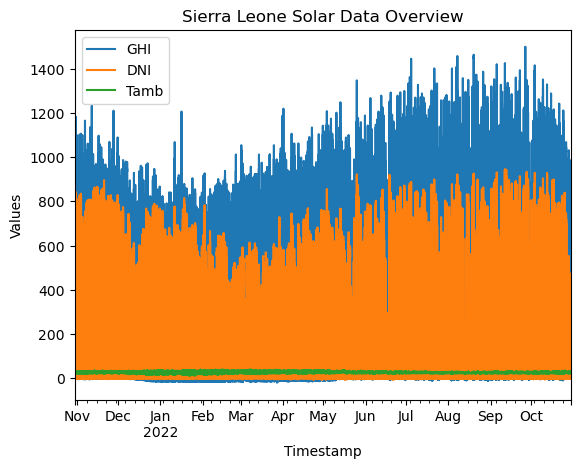

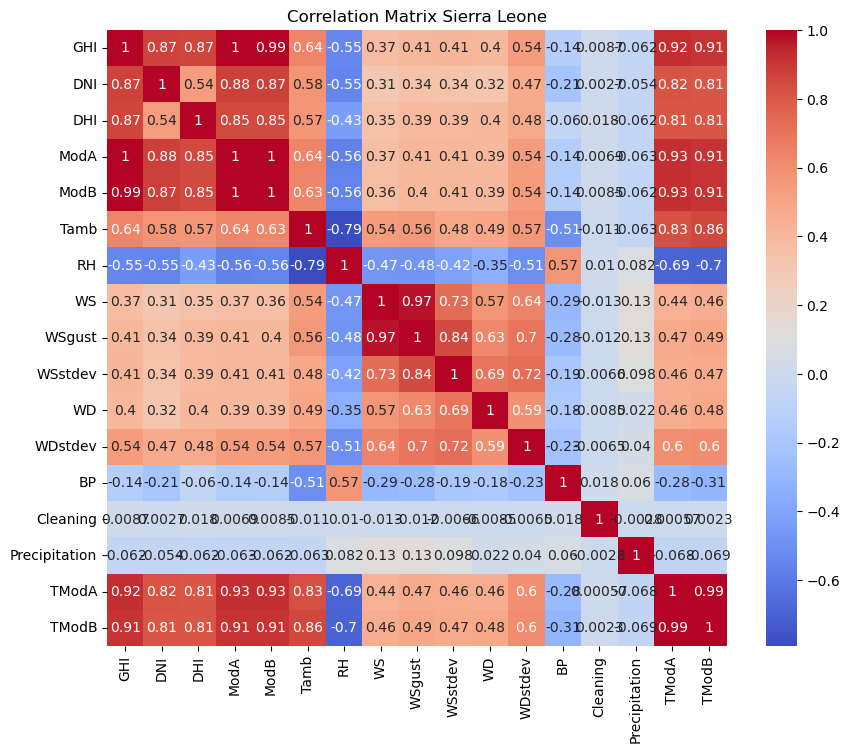

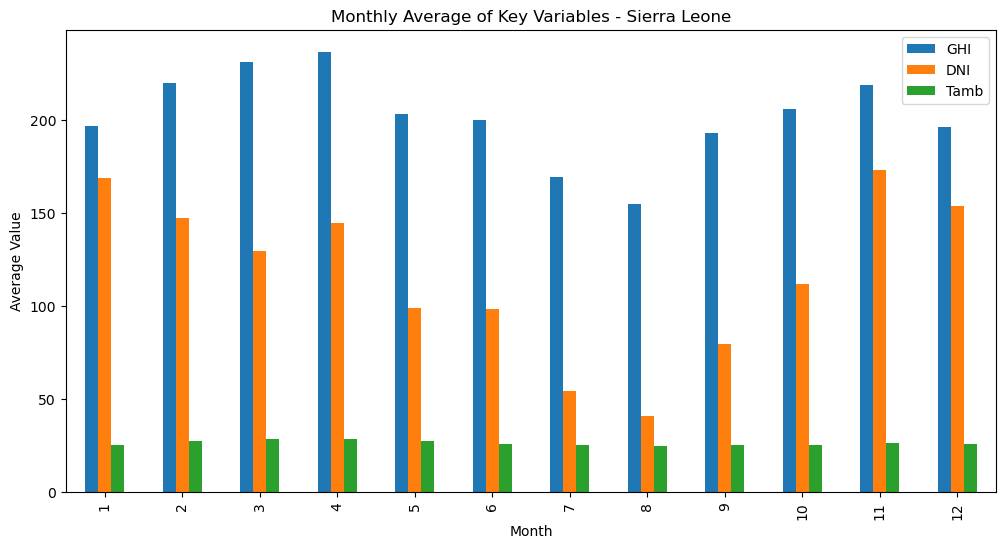

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df_sl_clean = pd.read_csv('../data/sierraleone_clean.csv', index_col='Timestamp', parse_dates=True)

# Plot time series of GHI, DNI, and Tamb over time (or whichever columns are available)
plt.figure(figsize=(12, 6))
df_sl_clean[['GHI', 'DNI', 'Tamb']].plot()
plt.title('Sierra Leone Solar Data Overview')
plt.ylabel('Values')
plt.show()

# Correlation heatmap (only numerical columns)
plt.figure(figsize=(10, 8))
sns.heatmap(df_sl_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Sierra Leone')
plt.show()

# Monthly averages for GHI, DNI, Tamb
df_sl_clean['Month'] = df_sl_clean.index.month
monthly_avg = df_sl_clean.groupby('Month')[['GHI', 'DNI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average of Key Variables - Sierra Leone')
plt.ylabel('Average Value')
plt.show()
